In [3]:
import requests
import networkx
import time
import collections
import matplotlib.pyplot as plt
import networkx as nx
import operator
import pandas as pd
import numpy as np
import seaborn as sns
import random
sns.set()
%matplotlib inline

# Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are network growing and prefferential attachment. Implement two restricted B&A-based models: <br >

Model ALack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

Model B Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.

Generate networks according to the models above ($N \gt 1000$ nodes)

Compute CDF/PDF, describe the distribution and compute\describe its properties.

Illustate the following dependencies:

average path length to the number of nodes

average clustering coefficient to the number of nodes

average node degee to the nodes "age"

Заведем немного вспомогательных функций

In [4]:
def remove_duplicates(a):
    i = len(a) - 1
    while i >= 0:
        j = i-1
        while j >= 0:
            if a[i] == a[j]:
                x = a.pop(j)
                i -= 1
            j -= 1
        i -= 1
    return a

In [5]:
def plot_pdf(bincenters0, yh0):
    plt.plot(bincenters0, yh0, '-', lw=2)
    plt.ylabel('count')
    plt.xlabel('x')
    return 

def plot_cdf(degrees):
    degrees = sorted(degrees)
    cdf, degree, cur_sum, i, max_val = [], 0, 0, 0, sum(degrees)
    while i < len(degrees):
        if degree > degrees[i]:
            while degree > degrees[i]:
                cur_sum += degrees[i]
                i += 1
                if i == len(degrees):
                    break
        degree += 1
        cdf.append(cur_sum / max_val)
    plt.plot(np.arange(0, max(degrees)+1), cdf[:-1], '-', lw=2)
    plt.ylabel('count')
    plt.xlabel('x')
    return

def get_bincenters(degrees, bins):
    yh0, binEdges=np.histogram(degrees, bins=bins)
    bincenters0 = 0.5*(binEdges[1:]+binEdges[:-1])
    return bincenters0, yh0

Ниже представлены функции генерации графа

In [6]:
def BA_model1(n, m, n0):
    av_deg = []
    if n0 < m:
        n0 = m+1
        print("wrong function arguments, n0 is taken equal to", m+1)
    # Create base graph
    G = nx.empty_graph(n0)
    for cur in range(n0, n):
        targets = np.random.choice(G.nodes(), m, replace=False)
        G.add_node(cur)
        new_edges = list(zip(np.full(m, cur), targets))
        G.add_edges_from(new_edges)
        av_deg.append(cur)
    av_deg = remove_duplicates(av_deg)
    deg = nx.degree(G)
    av_deg = [deg[x] for x in av_deg]
    return G, av_deg

def BA_model2(n0, m, num):
    av_deg = []
    # Create base graph
    G = nx.empty_graph(n0)
    for iteration in range(num):
        cur = random.randint(0, n0-1)
        # initialization
        deg = nx.degree(G).copy()
        nodes = G.nodes().copy()
        neigh = G.neighbors(cur)
        # remove existing neighbors
        for node in neigh:
            del deg[node]
            nodes.remove(node)
        # remove itself
        del deg[cur]
        nodes.remove(cur)
        # znamenatel
        sumdeg = sum(deg.values())  
        # check if all are zeros
        allzeros = False
        if sumdeg == 0:
            allzeros = True
        # create probabilities
        p = []
        nonzero = 0
        for new_neigh in nodes:
            # check if all are zeros
            if allzeros:
                p.append(1 / len(deg))
                nonzero += 1
            else:
                p.append(deg[new_neigh] / sumdeg)
                if deg[new_neigh] > 0:
                    nonzero += 1
        # print(m, len(nodes), nonzero)
        # find targets
        targets = np.random.choice(nodes, min(m, len(nodes), nonzero), replace=False, p=p)
        
        new_edges = list(zip(np.full(min(m, len(nodes), nonzero), cur), targets))
        G.add_edges_from(new_edges)
        av_deg.append(cur)
    av_deg = remove_duplicates(av_deg)
    deg = nx.degree(G)
    av_deg = [deg[x] for x in av_deg]
    return G, av_deg

Сгенерим первую модель

In [62]:
G_test1, av_deg = BA_model1(5000, 10, 11)

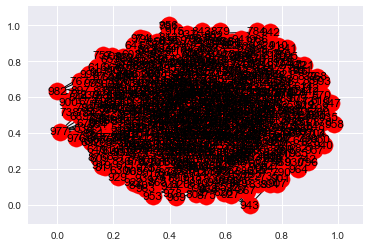

In [20]:
nx.draw_networkx(G_test1)

In [21]:
degrees = list(nx.degree(G_test1).values())

PDF и CDF

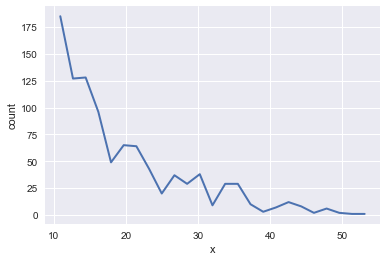

In [22]:
hist0 = get_bincenters(degrees, 25)
plot_pdf(hist0[0], hist0[1])

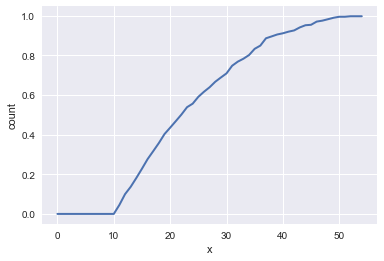

In [23]:
plot_cdf(degrees)

Различные гистограммы для centralities

(array([  16.,  104.,  292.,  489.,  579.,  572.,  478.,  438.,  408.,
         348.,  287.,  221.,  223.,  142.,  145.,   95.,   79.,   45.,
          24.,   15.]),
 array([ 0.28076383,  0.28572746,  0.2906911 ,  0.29565473,  0.30061836,
         0.305582  ,  0.31054563,  0.31550926,  0.32047289,  0.32543653,
         0.33040016,  0.33536379,  0.34032743,  0.34529106,  0.35025469,
         0.35521833,  0.36018196,  0.36514559,  0.37010922,  0.37507286,
         0.38003649]),
 <a list of 20 Patch objects>)

E:\Programming\Anaconda\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


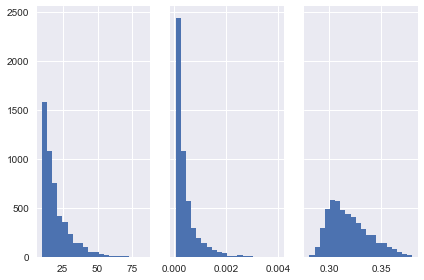

In [272]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(list(nx.degree(G_test1).values()), bins=20)
axs[1].hist(list(nx.betweenness_centrality(G_test1).values()), bins=20)
axs[2].hist(list(nx.closeness_centrality(G_test1).values()), bins=20)

Здесь представлены соответственно графики средней длины, коэффициента кластеризации и степени в зависимости от возраста

In [24]:
av_len1 = []
av_clust1 = []
for n in range(1000, 5000, 500):
    G_test1, av_deg1 = BA_model1(n, 10, 11)
    G_comp = G_test1.subgraph(max(nx.connected_component_subgraphs(G_test1), key=len))
    av_len1.append(nx.average_shortest_path_length(G_comp))
    av_clust1.append(nx.average_clustering(G_comp))
    print("calculated for", n, "nodes")

calculated for 1000 nodes
calculated for 1500 nodes
calculated for 2000 nodes
calculated for 2500 nodes
calculated for 3000 nodes
calculated for 3500 nodes
calculated for 4000 nodes
calculated for 4500 nodes


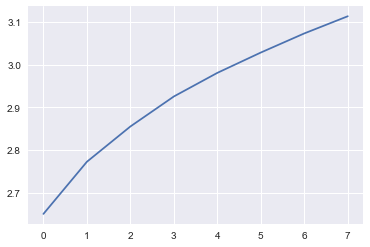

In [25]:
plt.plot(av_len1)

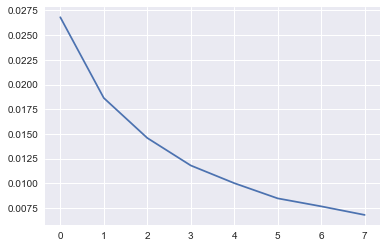

In [26]:
plt.plot(av_clust1)

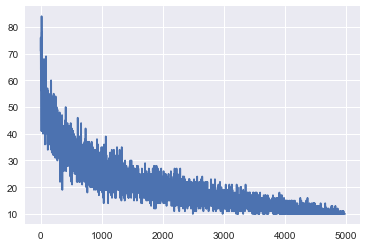

In [63]:
plt.plot(av_deg)

Можно заметить, что для последнего графика характерна примерно убывающая функция

Сгенерим вторую модель (на 1000 вершин и 3000 итераций)

In [16]:
G_test2, av_deg = BA_model2(1000, 10, 3000)

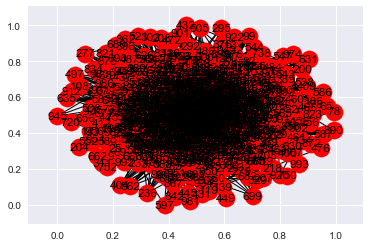

In [31]:
nx.draw_networkx(G_test2.subgraph(max(nx.connected_component_subgraphs(G_test2), key=len)))

In [32]:
degrees = list(nx.degree(G_test2).values())

Также построим графики PDF, CDF, среднего пути, коэффициента кластеризации и степени в зависимости от возраста

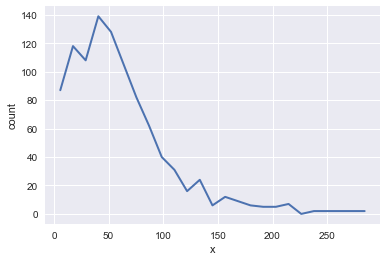

In [33]:
hist0 = get_bincenters(degrees, 25)
plot_pdf(hist0[0], hist0[1])

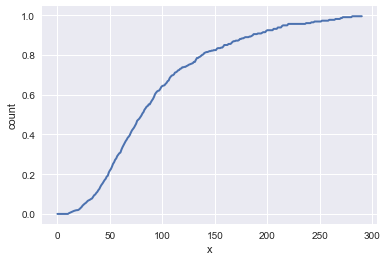

In [34]:
plot_cdf(degrees)

(array([  39.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   35.,   86.,  151.,  373.,  269.,
          40.,    7.]),
 array([ 0.        ,  0.02881082,  0.05762164,  0.08643247,  0.11524329,
         0.14405411,  0.17286493,  0.20167575,  0.23048658,  0.2592974 ,
         0.28810822,  0.31691904,  0.34572986,  0.37454069,  0.40335151,
         0.43216233,  0.46097315,  0.48978398,  0.5185948 ,  0.54740562,
         0.57621644]),
 <a list of 20 Patch objects>)

E:\Programming\Anaconda\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


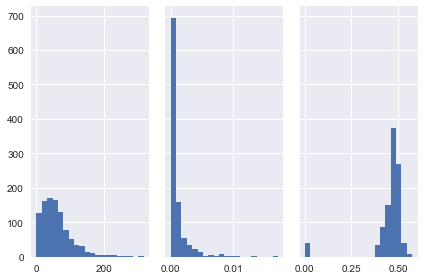

In [17]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(list(nx.degree(G_test2).values()), bins=20)
axs[1].hist(list(nx.betweenness_centrality(G_test2).values()), bins=20)
axs[2].hist(list(nx.closeness_centrality(G_test2).values()), bins=20)

In [36]:
av_len2 = []
av_clust2 = []
for n in range(1000, 5000, 500):
    G_test2, av_deg2 = BA_model2(n, 10, n*3)
    G_comp = G_test2.subgraph(max(nx.connected_component_subgraphs(G_test2), key=len))
    av_len2.append(nx.average_shortest_path_length(G_comp))
    av_clust2.append(nx.average_clustering(G_comp))
    print("calculated for", n, "nodes")

calculated for 1000 nodes
calculated for 1500 nodes
calculated for 2000 nodes
calculated for 2500 nodes
calculated for 3000 nodes
calculated for 3500 nodes
calculated for 4000 nodes
calculated for 4500 nodes


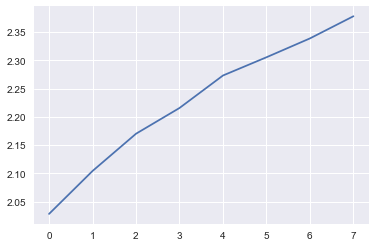

In [37]:
plt.plot(av_len2)

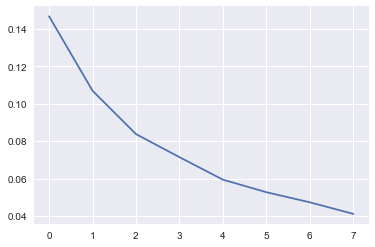

In [38]:
plt.plot(av_clust2)

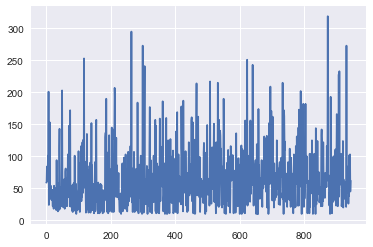

In [66]:
plt.plot(av_deg)

# Task 2

In [7]:
def VCM(q, n, n0=5, m0=5):
    av_deg = []
    # Create base graph
    G = nx.dense_gnm_random_graph(n0, m0)
    for cur in range(n0, n):
        tocopy = np.random.choice(G.nodes(), 1, replace=False)
        neigh = G.neighbors(int(tocopy))
        G.add_node(cur)
        new_edges = list(zip(np.full(len(neigh), cur), neigh))
        for i in range(len(new_edges)):
            r = random.random()
            if r > q:
                newtarget = new_edges[i][1]
                while newtarget in neigh or newtarget == cur:
                    newtarget = int(np.random.choice(G.nodes(), 1, replace=False))
                new_edges[i] = new_edges[i][0], newtarget
        G.add_edges_from(new_edges)
        av_deg.append(cur)
    av_deg = remove_duplicates(av_deg)
    deg = nx.degree(G)
    av_deg = [deg[x] for x in av_deg]
    return G, av_deg

In [18]:
G_test3, av_deg = VCM(0.7, 1000)

In [19]:
degrees = list(nx.degree(G_test3).values())

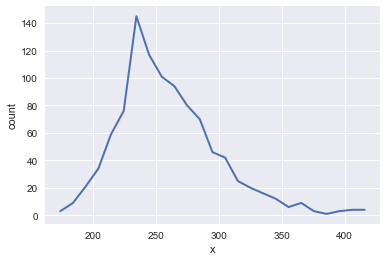

In [20]:
hist0 = get_bincenters(degrees, 25)
plot_pdf(hist0[0], hist0[1])

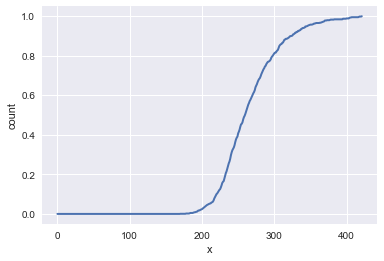

In [21]:
plot_cdf(degrees)

(array([   7.,   22.,   41.,   95.,  182.,  152.,  130.,  106.,   80.,
          52.,   47.,   25.,   20.,   13.,    6.,    9.,    2.,    2.,
           5.,    4.]),
 array([ 0.54620011,  0.55056417,  0.55492823,  0.55929229,  0.56365635,
         0.56802041,  0.57238446,  0.57674852,  0.58111258,  0.58547664,
         0.5898407 ,  0.59420476,  0.59856882,  0.60293288,  0.60729694,
         0.611661  ,  0.61602506,  0.62038912,  0.62475318,  0.62911723,
         0.63348129]),
 <a list of 20 Patch objects>)

E:\Programming\Anaconda\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


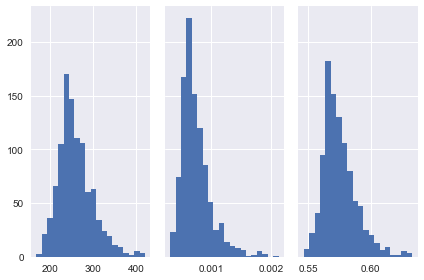

In [22]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(list(nx.degree(G_test3).values()), bins=20)
axs[1].hist(list(nx.betweenness_centrality(G_test3).values()), bins=20)
axs[2].hist(list(nx.closeness_centrality(G_test3).values()), bins=20)

In [23]:
av_len3 = []
av_clust3 = []
for n in range(1000, 3000, 250):
    G_test3, av_deg3 = VCM(0.7, n)
    G_comp = G_test3.subgraph(max(nx.connected_component_subgraphs(G_test3), key=len))
    av_len3.append(nx.average_shortest_path_length(G_comp))
    av_clust3.append(nx.average_clustering(G_comp))
    print("calculated for", n, "nodes")

calculated for 1000 nodes
calculated for 1250 nodes
calculated for 1500 nodes
calculated for 1750 nodes
calculated for 2000 nodes
calculated for 2250 nodes
calculated for 2500 nodes
calculated for 2750 nodes


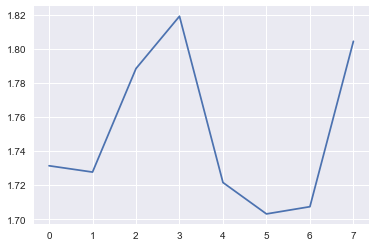

In [24]:
plt.plot(av_len3)

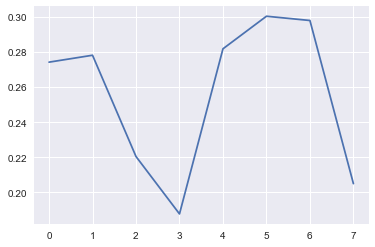

In [25]:
plt.plot(av_clust3)

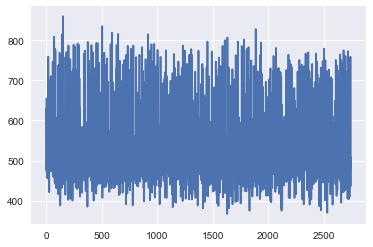

In [26]:
plt.plot(av_deg3)